In [4]:
import sys
sys.path.append('./../')

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
import helpertests as tst
import sparsedense as spd
import optim

In [ ]:
Z = optim.sample_from_ibp(8600, alpha=6.0, sigma=0.1, c=25)
net = Z.transpose() @ Z
K, N = Z.shape
links = []
for i in range(N - 1):
    for j in range(i + 1, N):
        if net[i, j] >= 1:
            links.append([i, j])

g = nx.Graph()
g.add_edges_from(links)
tst.test_stats(g)

- num nodes: 1153
- num edges: 46938
- edge node ratio: 40.71
- density: 0.070676
- mean degree: 81.42


In [ ]:
links_true = np.genfromtxt('enron.tsv', delimiter='\t', dtype=int)
g_true = nx.Graph()
g_true.add_edges_from(links_true)
tst.test_stats(g_true)

(0, 30)

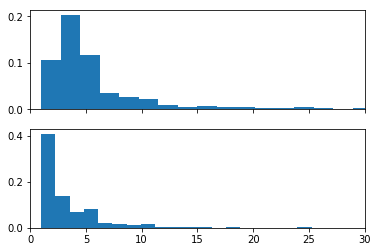

In [113]:
fig, ax = plt.subplots(2, 1, sharex=True)

deg = np.array([nx.degree(g, i) for i in g.nodes()])
deg_true = np.array([nx.degree(g_true, i) for i in g_true.nodes()])

ax[0].hist(deg, 200, density=True)
ax[1].hist(deg_true, 40, density=True)

plt.xlim(0, 30)

In [114]:
len(deg_true[np.where(deg == 1)])

163

In [115]:
len(deg_true[np.where(deg_true == 1)])

689

(0, 15)

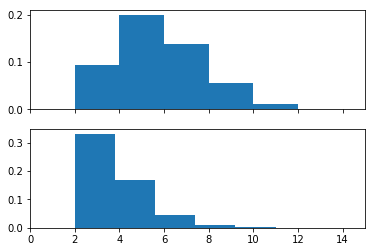

In [116]:
fig, ax = plt.subplots(2, 1, sharex=True)

clique = np.array([nx.node_clique_number(g, i) for i in g.nodes()])
clique_true = np.array([nx.node_clique_number(g_true, i) for i in g_true.nodes()])

ax[0].hist(clique, 5, density=True)
ax[1].hist(clique_true, 5, density=True)

plt.xlim(0, 15)

(0, 5)

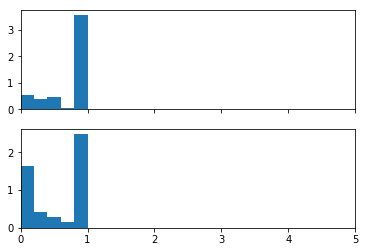

In [117]:
fig, ax = plt.subplots(2, 1, sharex=True)

clustering = np.array([nx.clustering(g, i) for i in g.nodes()])
clustering_true = np.array([nx.clustering(g_true, i) for i in g_true.nodes()])

ax[0].hist(clustering, 5, density=True)
ax[1].hist(clustering_true, 5, density=True)

plt.xlim(0, 5)